In [8]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [11]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


**Problem-1**: we will reconstruct missing values in a real ECG signal. To that end, first load the ECG signal data and make a component plot of the loaded ECG vector by executing the cell below. Note the missing values:

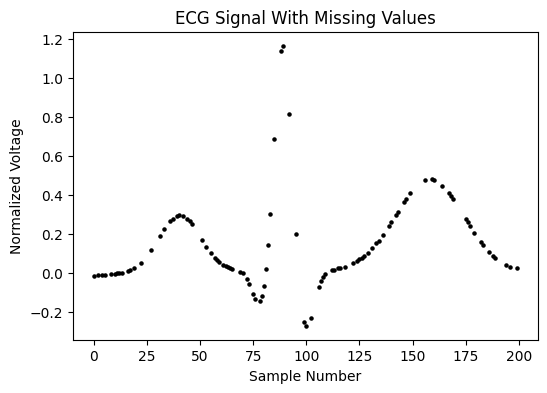

In [9]:
## Load data
FILE = 'ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)

## Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.scatter(component_index, df_ecg['ecgvalues'], color = 'black', marker = 'o', s = 5)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values');

**Problem-1.1**: extract the indices corresponding to the missing ECG values

In [37]:
indices_unknown = df_ecg[df_ecg['ecgvalues'].isna()].index
indices_unknown

Index([  1,   3,   6,   7,   9,  14,  15,  18,  20,  21,  23,  24,  25,  26,
        28,  29,  30,  32,  34,  35,  38,  41,  43,  47,  48,  49,  50,  52,
        54,  56,  60,  66,  67,  68,  71,  74,  77,  84,  86,  87,  90,  91,
        93,  94,  96,  97,  98, 101, 103, 104, 105, 110, 111, 114, 117, 119,
       120, 121, 123, 128, 130, 132, 135, 137, 138, 141, 144, 145, 148, 150,
       151, 152, 153, 154, 155, 157, 158, 161, 162, 163, 165, 166, 170, 171,
       172, 173, 174, 178, 180, 181, 184, 185, 187, 190, 191, 192, 193, 195,
       197, 198],
      dtype='int64')

**Problem-1.2**: extract the indices corresponding to the known ECG values

In [15]:
indices_known = df_ecg[df_ecg['ecgvalues'].notna()].index
indices_known

Index([  0,   2,   4,   5,   8,  10,  11,  12,  13,  16,  17,  19,  22,  27,
        31,  33,  36,  37,  39,  40,  42,  44,  45,  46,  51,  53,  55,  57,
        58,  59,  61,  62,  63,  64,  65,  69,  70,  72,  73,  75,  76,  78,
        79,  80,  81,  82,  83,  85,  88,  89,  92,  95,  99, 100, 102, 106,
       107, 108, 109, 112, 113, 115, 116, 118, 122, 124, 125, 126, 127, 129,
       131, 133, 134, 136, 139, 140, 142, 143, 146, 147, 149, 156, 159, 160,
       164, 167, 168, 169, 175, 176, 177, 179, 182, 183, 186, 188, 189, 194,
       196, 199],
      dtype='int64')

**Problem-1.3**: build a vector of known ecg signal values

In [28]:
x_known = np.array(df_ecg['ecgvalues'][indices_known])

**Probem-1.4**: construct the matrices $S_1$ and $S_2.$

In [87]:
I = np.eye(len(df_ecg))
S1 = I[indices_known, :]
S2 = I[indices_unknown, :]

**Problem-1.5**: build the matrix $D$

In [ ]:
n = len(df_ecg) # size of the signal
a = 1*np.ones(n-1)
b = ?
D = np.diag(a, -1) + np.diag(?) + np.diag(?, ?)
D = D[?:?, ?]

Reconstruct the missing values such that the resulting ECG signal is smooth (we will do this part during the lab session).

**Problem-2**: consider an $n$-vector $x$ of time series values. The following code snippet simulates such as vector. Try three different cycle frequency values (0.5, 1.0, 2.0) in the variable f below and observe what happens to the component plot of the vector.

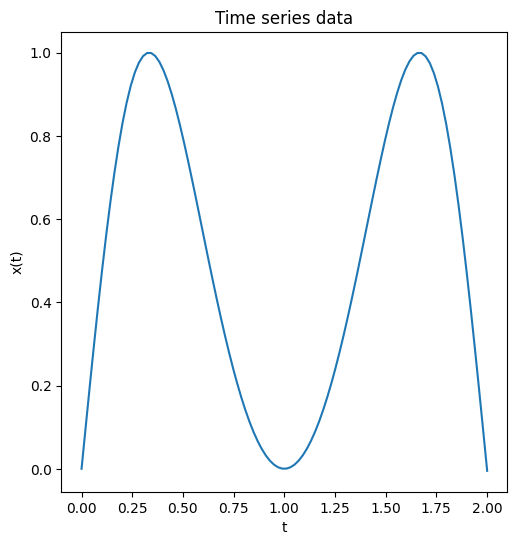

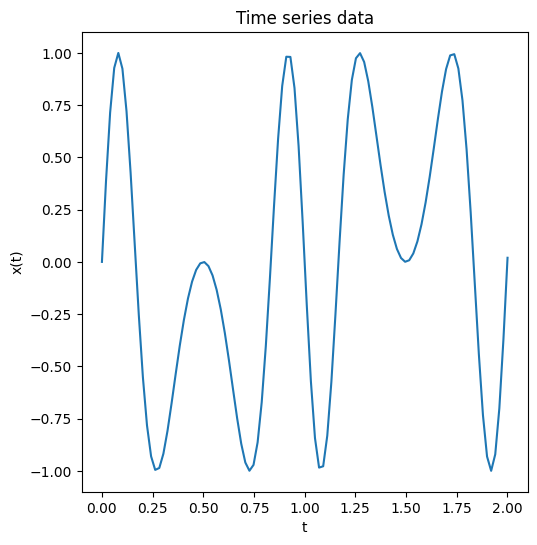

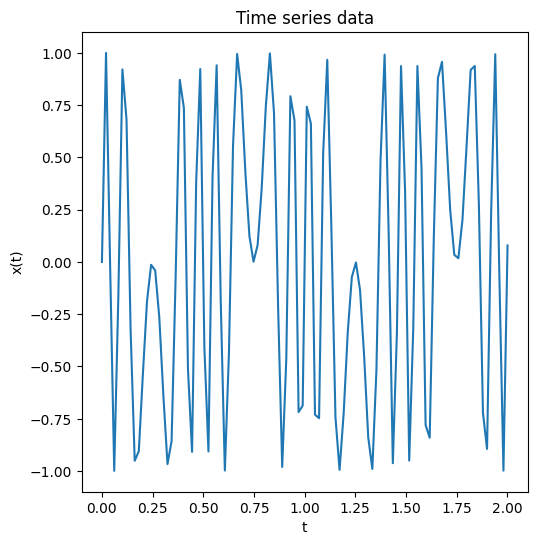

In [89]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f =  [0.5, 1, 2]# cycle frequency
for i in f:
    omega = 2 * np.pi * i # angular frequency
    x = np.sin(omega*np.sin(0.5*omega*t))
    fig, ax2 = plt.subplots(1, 1, figsize = (6, 6))
    fig.tight_layout(pad = 4.0)
    ax2.plot(t, x,)
    ax2.set_xlabel('t')
    ax2.set_ylabel('x(t)')
    ax2.set_title('Time series data');

**Problem 2.1**: In order to measure how rough or wiggly a signal represented by a vector is, we measure the so called *Dirichlet energy* of the signal which for the vector $x$ we saw above is defined as:

$$(x_2-x_1)^2+(x_3-x_2)^2+\cdots+(x_{100}-x_{99})^2.$$

Calculate the Dirichlet energy of the vector $x$ for the three different frequency values mentioned above. How do the values compare to each other?

Use the following clue:

Dirichlet energy of $x = \lVert Dx\lVert_2^2,$ where $D$ is the matrix $$\begin{bmatrix}-1 & ? & ? &\cdots&?&?\\0 & ? & 1 &\cdots&?&?\\? & ? & ? &\cdots&?&?\\ &  & \vdots &\vdots&&\\? & ? & ? &\cdots&-1&?\end{bmatrix}.$$

In [90]:
def Dirichlet_energy(f):
    omega = 2 * np.pi * f
    x = np.sin(omega*np.sin(0.5*omega*t))
    return np.sum(np.diff(x[:-1])**2)

In [91]:
for i in [0.5,1,2]:
    print(f"f:{i} - D: {Dirichlet_energy(i)}")

f:0.5 - D: 0.21986153538491857
f:1 - D: 3.6562021053627562
f:2 - D: 51.99671765951632
